The following defines the PDE, by way of a function for $\mathbf{f}(\mathbf{u})$ and its derivative (Jacobian matrix), and a function for the Dirichlet boundary condition.

In [2]:
using SparseArrays

pde = function pde(U,X,Y,d)
    LU = d.Dxx*U + U*d.Dyy'     # apply Laplacian
    F = @. U*(1-U^2) + 0.05*LU  # residual

    L = kron(d.Dyy,d.Ix) + kron(d.Iy,d.Dxx)
    u = d.vec(U)
    J = spdiagm(0 => @. 1-3*u^2)  + 0.05*L  # Jacobian
    return F,J
end

g(x,y) = tanh(5*(x+2*y-1));    # boundary condition

We solve the PDE and then plot the result.

In [5]:
include("../FNC.jl")

U,X,Y = FNC.newtonpde(pde,g,100,[0,1],100,[0,1]);

Norm of residual = 50.47103836842461


Norm of residual = 11.501063264141608
Norm of residual = 0.9181128807165372
Norm of residual = 0.0072331463239263885
Norm of residual = 4.983443712565061e-6
Norm of residual = 9.168813693748987e-10
Norm of residual = 1.3974711364413496e-11


([-0.999909 -0.999889 … 0.999889 0.999909; -0.9999 -0.999357 … 0.999662 0.999918; … ; -0.0499584 0.0430201 … 0.999939 1.0; 0.0 0.099668 … 1.0 1.0], [0.0 0.0 … 0.0 0.0; 0.01 0.01 … 0.01 0.01; … ; 0.99 0.99 … 0.99 0.99; 1.0 1.0 … 1.0 1.0], [0.0 0.01 … 0.99 1.0; 0.0 0.01 … 0.99 1.0; … ; 0.0 0.01 … 0.99 1.0; 0.0 0.01 … 0.99 1.0])

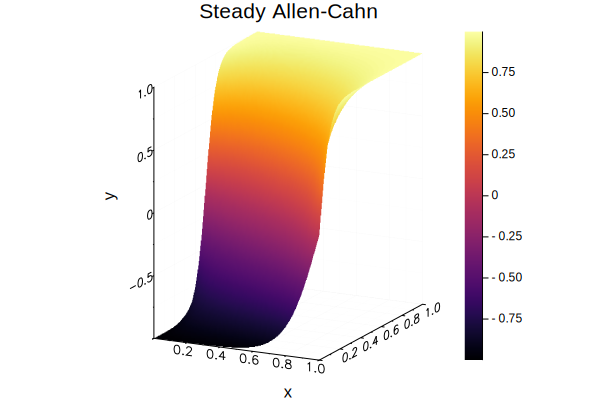

In [7]:
using Plots
surface(X[:,1],Y[1,:],U',camera=(32,30),xlabel="x",ylabel="y",
    title="Steady Allen-Cahn")